In [1]:
from examples.sphere import *
from ipywidgets import *
%matplotlib inline

# Plot

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


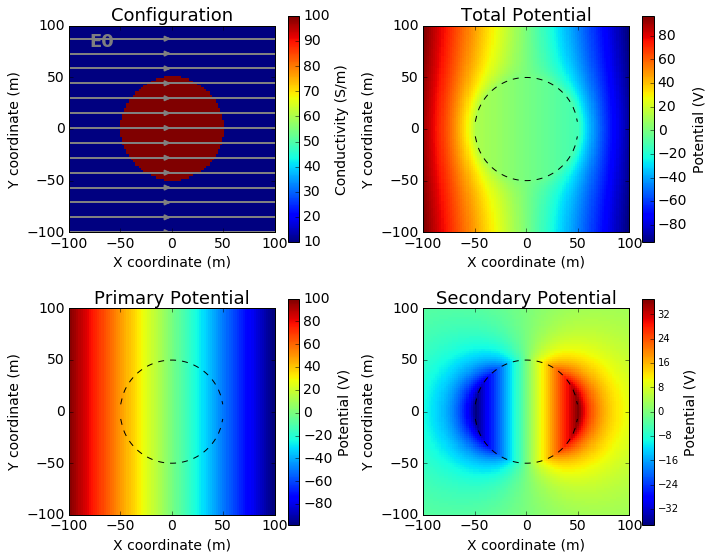

In [2]:
sig0 = 10.          # conductivity of the wholespace
sig1 = 100.         # conductivity of the sphere
R    = 50.          # radius of the sphere
E0   = 1.           # inducing field strength
n = 100             #level of discretisation
xr = np.linspace(-2.*R, 2.*R, n) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
dx = xr[1]-xr[0]       # mesh spacing
dy = yr[1]-yr[0]       # mesh spacing
zr = np.r_[0]          # identical to saying `zr = np.array([0])`
XYZ = ndgrid(xr,yr,zr) # Space Definition
PlotOpt = 'Total'

example = 'Potentials' # ElectricFields, Currents, Charges

if example is 'Potentials':
    fig,ax = plot_Potentials(XYZ, R, sig1, sig0, E0)
elif example is 'ElectricFields':
    fig,ax = plot_ElectricField(XYZ,R, sig1, sig0 , E0, PlotOpt)
elif example is 'Currents':
    fig,ax = plot_Currents(XYZ,R, sig1, sig0,E0,PlotOpt)
elif example is 'Charges':
    fig,ax = plot_Charges(XYZ,R, sig1, sig0, E0)

# Interactive

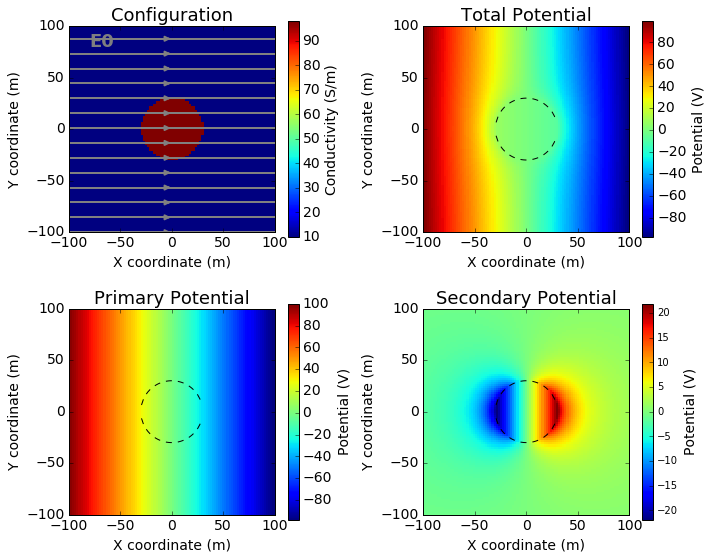

None

In [6]:
R_slider  = FloatSlider(min=0., max =50., step=10.,value=50.)
S1_slider = FloatSlider(min=1., max =100., step=1.,value=100.)
S0_slider = FloatSlider(min=1., max =100., step=1.,value=10.)
E0_slider = FloatSlider(min=-10., max =10., step=1.,value=1.)

def plot_Potentials_interactive(R, sig1, sig0, E0):
    fig, ax = plot_Potentials(XYZ,R,sig1,sig0,E0)
    plt.show()
    return None

app = interactive(plot_Potentials_interactive, R=R_slider, sig1=S1_slider, sig0=S0_slider,E0=E0_slider)
app